Линейная регрессия

In [1]:
%pip install numpy matplotlib scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\anmrt\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, BayesianRidge
from sklearn.metrics import r2_score

In [3]:
#Данные для преобразования
X = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([5, 20, 14, 32, 22, 38])

In [4]:
#Модель регрессии создание
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [5]:
r_sq = model.score(X, y)
print('Коэффициент детерминации:', r_sq)
print('Коэффициент b₀ (intercept):', model.intercept_)
print('Коэффициент b₁ (slope):', model.coef_[0])

Коэффициент детерминации: 0.7158756137479542
Коэффициент b₀ (intercept): 5.633333333333329
Коэффициент b₁ (slope): 0.54


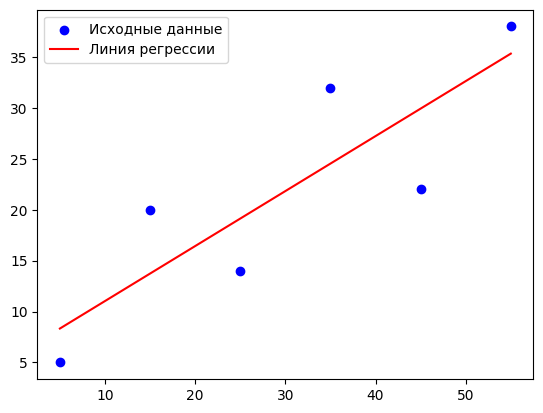

In [6]:
X_new = np.arange(5, 60, 5).reshape((-1, 1))
y_pred = model.predict(X_new)

plt.scatter(X, y, color='blue', label='Исходные данные')
plt.plot(X_new, y_pred, color='red', label='Линия регрессии')
plt.legend()
plt.show()

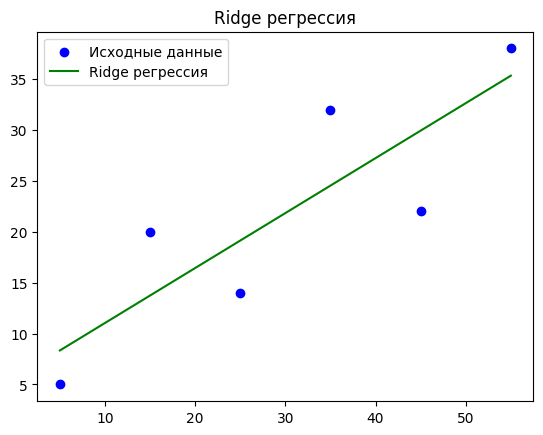

In [7]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X, y)
y_pred_ridge = ridge_model.predict(X_new)

plt.scatter(X, y, color='blue', label='Исходные данные')
plt.plot(X_new, y_pred_ridge, color='green', label='Ridge регрессия')
plt.legend()
plt.title('Ridge регрессия')
plt.show()

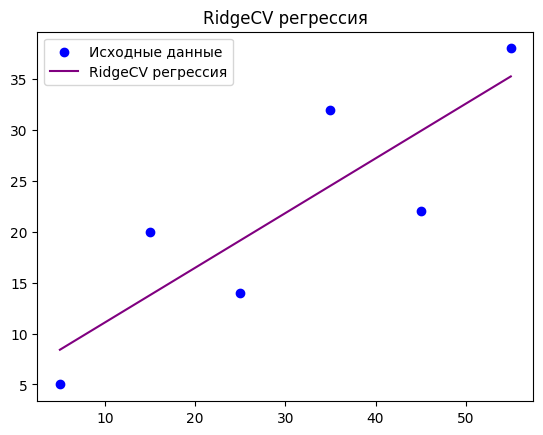

In [8]:
ridge_cv_model = RidgeCV(alphas=[0.1, 1.0, 10.0], cv=3)
ridge_cv_model.fit(X, y)
y_pred_ridge_cv = ridge_cv_model.predict(X_new)

plt.scatter(X, y, color='blue', label='Исходные данные')
plt.plot(X_new, y_pred_ridge_cv, color='purple', label='RidgeCV регрессия')
plt.legend()
plt.title('RidgeCV регрессия')
plt.show()

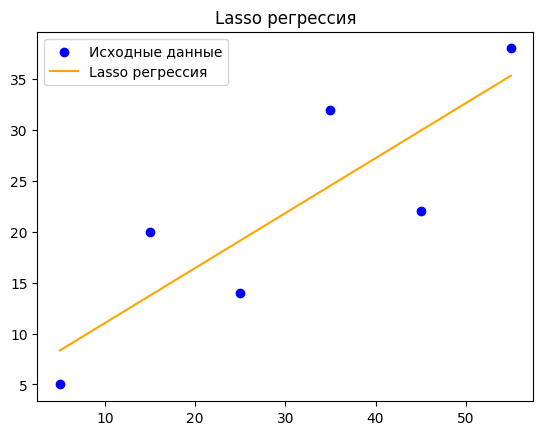

In [9]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X, y)
y_pred_lasso = lasso_model.predict(X_new)

plt.scatter(X, y, color='blue', label='Исходные данные')
plt.plot(X_new, y_pred_lasso, color='orange', label='Lasso регрессия')
plt.legend()
plt.title('Lasso регрессия')
plt.show()

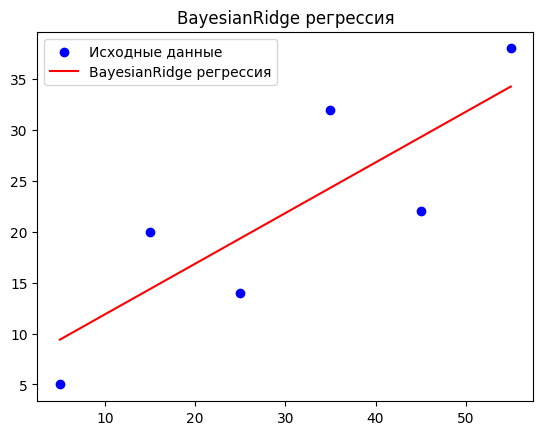

In [10]:
bayesian_ridge_model = BayesianRidge()
bayesian_ridge_model.fit(X, y)
y_pred_bayesian = bayesian_ridge_model.predict(X_new)

plt.scatter(X, y, color='blue', label='Исходные данные')
plt.plot(X_new, y_pred_bayesian, color='red', label='BayesianRidge регрессия')
plt.legend()
plt.title('BayesianRidge регрессия')
plt.show()

In [11]:
models = [model, ridge_model, ridge_cv_model, lasso_model, bayesian_ridge_model]
model_names = ['LinearRegression', 'Ridge', 'RidgeCV', 'Lasso', 'BayesianRidge']
r2_scores = []

In [12]:
for mdl in models:
    y_pred = mdl.predict(X)
    r2_scores.append(r2_score(y, y_pred))

for name, r2 in zip(model_names, r2_scores):
    print(f'{name}: R^2 = {r2:.4f}')

LinearRegression: R^2 = 0.7159
Ridge: R^2 = 0.7159
RidgeCV: R^2 = 0.7159
Lasso: R^2 = 0.7159
BayesianRidge: R^2 = 0.7114


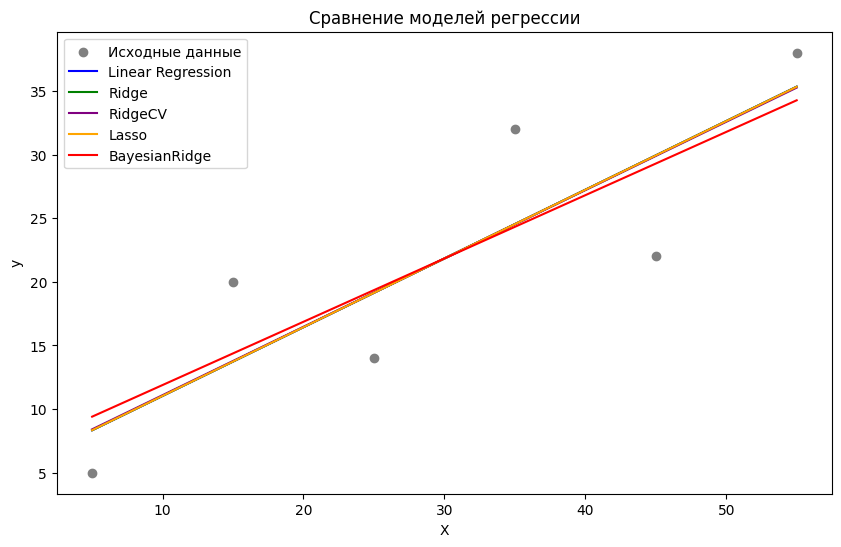

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='gray', label='Исходные данные')
plt.plot(X, model.predict(X), color='blue', label='Linear Regression')
plt.plot(X, ridge_model.predict(X), color='green', label='Ridge')
plt.plot(X, ridge_cv_model.predict(X), color='purple', label='RidgeCV')
plt.plot(X, lasso_model.predict(X), color='orange', label='Lasso')
plt.plot(X, bayesian_ridge_model.predict(X), color='red', label='BayesianRidge')
plt.legend()
plt.title('Сравнение моделей регрессии')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

по каждому методу рассказать как оценить качество коэф детерминации какая функция логистической регрессии